# **Proyecto de Ingeniería de Datos: Pipeline ETL de Uber**
### <font color = "green">Autor: Alejandro Parra Palacios</font>
---
Este proyecto tiene como objetivo construir un pipeline ETL (Extracción, Transformación y Carga) para procesar los datos de Uber, con el fin de analizarlos y generar insights útiles.

## Importe de liberias

In [43]:
# Importe de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests

## Conexion al dataset

In [44]:
url = 'https://storage.googleapis.com/uber-data-engineering-project-alejoparra/uber_data.csv'
response = requests.get(url)

print(response.status_code)

200


In [45]:
data = pd.read_csv(io.StringIO(response.text), sep = ',')

In [46]:
# Copiamos el dataset
df = data.copy()

## Analisis Exploratorio de los Datos `EDA`

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               100000 non-null  int64  
 1   tpep_pickup_datetime   100000 non-null  object 
 2   tpep_dropoff_datetime  100000 non-null  object 
 3   passenger_count        100000 non-null  int64  
 4   trip_distance          100000 non-null  float64
 5   pickup_longitude       100000 non-null  float64
 6   pickup_latitude        100000 non-null  float64
 7   RatecodeID             100000 non-null  int64  
 8   store_and_fwd_flag     100000 non-null  object 
 9   dropoff_longitude      100000 non-null  float64
 10  dropoff_latitude       100000 non-null  float64
 11  payment_type           100000 non-null  int64  
 12  fare_amount            100000 non-null  float64
 13  extra                  100000 non-null  float64
 14  mta_tax                100000 non-nul

In [48]:
df.duplicated().sum()

np.int64(0)

In [49]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [50]:
df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.88327,1.929170,3.034270,-73.288983,40.375220,1.040120,-73.312418,40.388064,1.337770,13.252608,0.101695,0.497000,1.872531,0.367415,0.299496,16.390721
std,0.32110,1.589408,3.846951,7.089652,3.901413,0.284238,6.964171,3.833974,0.481356,11.685574,0.202166,0.042673,2.618611,1.527758,0.016642,14.437180
min,1.00000,0.000000,0.000000,-121.933327,0.000000,1.000000,-121.933327,0.000000,1.000000,-47.000000,-0.500000,-0.500000,-2.700000,0.000000,-0.300000,-47.300000
25%,2.00000,1.000000,0.990000,-73.990959,40.738891,1.000000,-73.990547,40.738541,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.00000,1.000000,1.670000,-73.980202,40.755299,1.000000,-73.978416,40.755079,1.000000,9.500000,0.000000,0.500000,1.360000,0.000000,0.300000,11.800000
75%,2.00000,2.000000,3.200000,-73.964203,40.769021,1.000000,-73.962090,40.767910,2.000000,15.000000,0.000000,0.500000,2.460000,0.000000,0.300000,18.300000
max,2.00000,6.000000,184.400000,0.000000,41.204548,6.000000,0.000000,42.666893,4.000000,819.500000,4.500000,0.500000,125.880000,25.540000,0.300000,832.800000


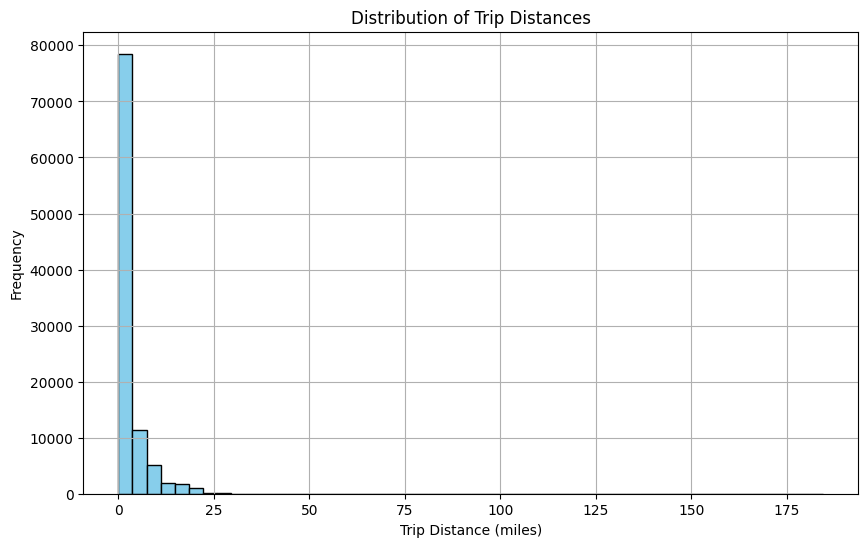

In [51]:
plt.figure(figsize = (10, 6))
plt.hist(df['trip_distance'], bins = 50, color = 'skyblue', edgecolor = 'black')
plt.title('Distribution of Trip Distances')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

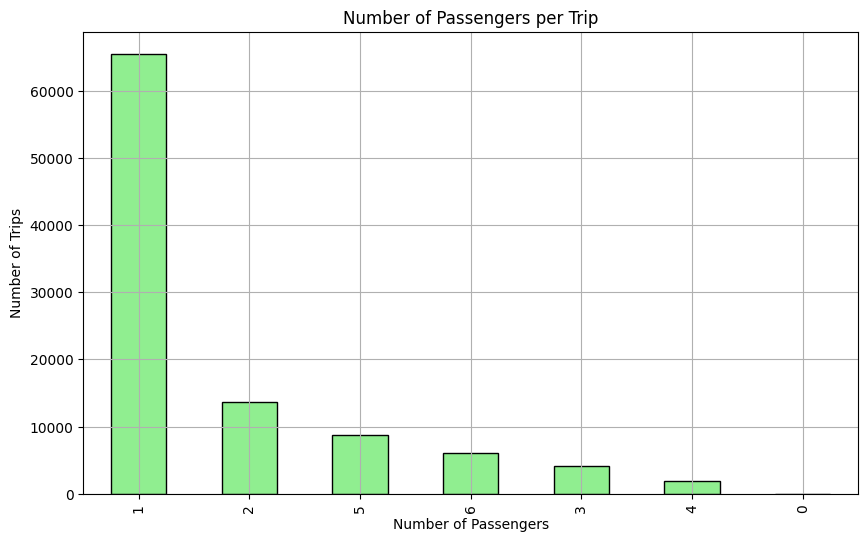

In [52]:
plt.figure(figsize = (10, 6))
df['passenger_count'].value_counts().plot(kind = 'bar', color = 'lightgreen', edgecolor = 'black')
plt.title('Number of Passengers per Trip')
plt.xlabel('Number of Passengers')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

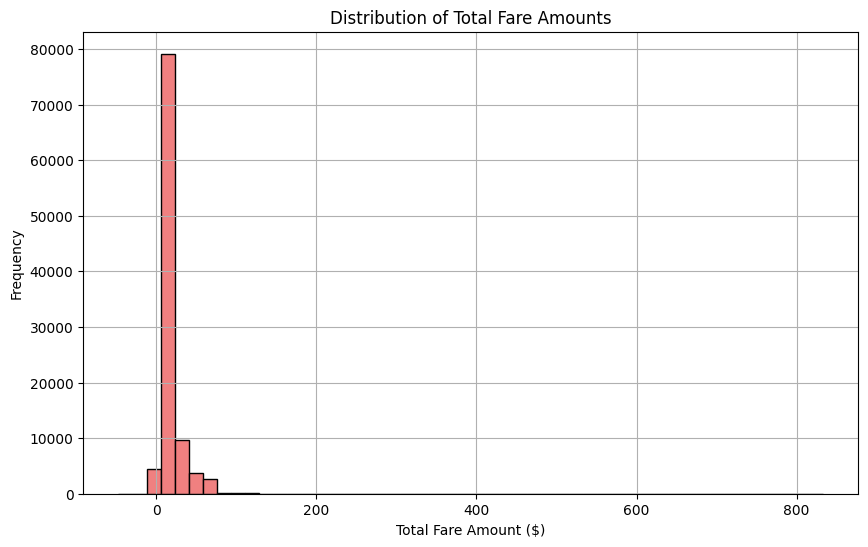

In [53]:
plt.figure(figsize = (10, 6))
plt.hist(df['total_amount'], bins = 50, color = 'lightcoral', edgecolor = 'black')
plt.title('Distribution of Total Fare Amounts')
plt.xlabel('Total Fare Amount ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Transformacion de datos

In [54]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               100000 non-null  int64         
 1   tpep_pickup_datetime   100000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  100000 non-null  datetime64[ns]
 3   passenger_count        100000 non-null  int64         
 4   trip_distance          100000 non-null  float64       
 5   pickup_longitude       100000 non-null  float64       
 6   pickup_latitude        100000 non-null  float64       
 7   RatecodeID             100000 non-null  int64         
 8   store_and_fwd_flag     100000 non-null  object        
 9   dropoff_longitude      100000 non-null  float64       
 10  dropoff_latitude       100000 non-null  float64       
 11  payment_type           100000 non-null  int64         
 12  fare_amount            100000 non-null  float

## Constuccion del modelo `Estrella`

### Tabla tiempo `datetime_dim`

In [56]:
datetime_dim = df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].drop_duplicates().reset_index(drop = True)

In [57]:
datetime_dim['pick_hour'] = datetime_dim['tpep_pickup_datetime'].dt.hour
datetime_dim['pick_day'] = datetime_dim['tpep_pickup_datetime'].dt.day
datetime_dim['pick_month'] = datetime_dim['tpep_pickup_datetime'].dt.month
datetime_dim['pick_year'] = datetime_dim['tpep_pickup_datetime'].dt.year
datetime_dim['pick_weekday'] = datetime_dim['tpep_pickup_datetime'].dt.weekday

datetime_dim['drop_hour'] = datetime_dim['tpep_dropoff_datetime'].dt.hour
datetime_dim['drop_day'] = datetime_dim['tpep_dropoff_datetime'].dt.day
datetime_dim['drop_month'] = datetime_dim['tpep_dropoff_datetime'].dt.month
datetime_dim['drop_year'] = datetime_dim['tpep_dropoff_datetime'].dt.year
datetime_dim['drop_weekday'] = datetime_dim['tpep_dropoff_datetime'].dt.weekday

In [58]:
datetime_dim['datetime_id'] = datetime_dim.index

In [59]:
datetime_dim = datetime_dim[['datetime_id', 'tpep_pickup_datetime', 'pick_hour', 'pick_day', 'pick_month', 'pick_year', 'pick_weekday',
                             'tpep_dropoff_datetime', 'drop_hour', 'drop_day', 'drop_month', 'drop_year', 'drop_weekday']]

In [60]:
datetime_dim

,datetime_id,tpep_pickup_datetime,pick_hour,pick_day,pick_month,pick_year,pick_weekday,tpep_dropoff_datetime,drop_hour,drop_day,drop_month,drop_year,drop_weekday
0,0,2016-03-01 00:00:00,0,1,3,2016,1,2016-03-01 00:07:55,0,1,3,2016,1
1,1,2016-03-01 00:00:00,0,1,3,2016,1,2016-03-01 00:11:06,0,1,3,2016,1
2,2,2016-03-01 00:00:00,0,1,3,2016,1,2016-03-01 00:31:06,0,1,3,2016,1
3,3,2016-03-01 00:00:00,0,1,3,2016,1,2016-03-01 00:00:00,0,1,3,2016,1
4,4,2016-03-01 00:00:01,0,1,3,2016,1,2016-03-01 00:16:04,0,1,3,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99848,99848,2016-03-01 06:17:10,6,1,3,2016,1,2016-03-01 06:22:15,6,1,3,2016,1
99849,99849,2016-03-01 06:17:10,6,1,3,2016,1,2016-03-01 06:32:41,6,1,3,2016,1
99850,99850,2016-03-01 06:17:10,6,1,3,2016,1,2016-03-01 06:37:23,6,1,3,2016,1
99851,99851,2016-03-01 06:17:10,6,1,3,2016,1,2016-03-01 06:22:09,6,1,3,2016,1


### Tabla pasajeros `passenger_count_dim `

In [61]:
passenger_count_dim = df[['passenger_count']].drop_duplicates().reset_index(drop = True)
passenger_count_dim['passenger_count_id'] = passenger_count_dim.index
passenger_count_dim = passenger_count_dim[['passenger_count_id','passenger_count']]

In [62]:
passenger_count_dim

,passenger_count_id,passenger_count
0,0,1
1,1,2
2,2,3
3,3,5
4,4,6
5,5,4
6,6,0


### Tabla distancia por viaje `trip_distance_dim `

In [63]:
trip_distance_dim = df[['trip_distance']].drop_duplicates().reset_index(drop = True)
trip_distance_dim['trip_distance_id'] = trip_distance_dim.index
trip_distance_dim = trip_distance_dim[['trip_distance_id','trip_distance']]

In [64]:
trip_distance_dim

,trip_distance_id,trip_distance
0,0,2.50
1,1,2.90
2,2,19.98
3,3,10.78
4,4,30.43
...,...,...
2298,2298,23.38
2299,2299,15.91
2300,2300,21.11
2301,2301,20.63


### Tabla codigo de tarifa `rate_code_dim`

In [65]:
rate_code_type = {
    1:"Standard rate",
    2:"JFK",
    3:"Newark",
    4:"Nassau or Westchester",
    5:"Negotiated fare",
    6:"Group ride"
}

rate_code_dim = df[['RatecodeID']].drop_duplicates().reset_index(drop = True)
rate_code_dim['rate_code_id'] = rate_code_dim.index
rate_code_dim['rate_code_name'] = rate_code_dim['RatecodeID'].map(rate_code_type)
rate_code_dim = rate_code_dim[['rate_code_id','RatecodeID','rate_code_name']]

In [66]:
rate_code_dim

,rate_code_id,RatecodeID,rate_code_name
0,0,1,Standard rate
1,1,3,Newark
2,2,2,JFK
3,3,5,Negotiated fare
4,4,4,Nassau or Westchester
5,5,6,Group ride


### Tabla localidad `pickup_location_dim`

In [67]:
pickup_location_dim = df[['pickup_longitude', 'pickup_latitude']].drop_duplicates().reset_index(drop = True)
pickup_location_dim['pickup_location_id'] = pickup_location_dim.index
pickup_location_dim = pickup_location_dim[['pickup_location_id','pickup_latitude','pickup_longitude']] 

In [68]:
pickup_location_dim

,pickup_location_id,pickup_latitude,pickup_longitude
0,0,40.765152,-73.976746
1,1,40.767925,-73.983482
2,2,40.644810,-73.782021
3,3,40.769814,-73.863419
4,4,40.792183,-73.971741
...,...,...,...
98050,98050,40.750519,-73.990898
98051,98051,40.718296,-74.014488
98052,98052,40.774097,-73.963379
98053,98053,40.763111,-73.984901


### Tabla lugar de entrega `dropoff_location_dim`

In [69]:
dropoff_location_dim = df[['dropoff_longitude', 'dropoff_latitude']].drop_duplicates().reset_index(drop = True)
dropoff_location_dim['dropoff_location_id'] = dropoff_location_dim.index
dropoff_location_dim = dropoff_location_dim[['dropoff_location_id','dropoff_latitude','dropoff_longitude']]

In [70]:
dropoff_location_dim

,dropoff_location_id,dropoff_latitude,dropoff_longitude
0,0,40.746128,-74.004265
1,1,40.733166,-74.005943
2,2,40.675770,-73.974541
3,3,40.757767,-73.969650
4,4,40.695053,-74.177170
...,...,...,...
98412,98412,40.750462,-73.998245
98413,98413,40.752529,-73.982361
98414,98414,40.770512,-73.865028
98415,98415,40.759148,-73.970695


### Tabla nombre de tipo de pago `payment_type_dim`

In [71]:
payment_type_name = {
    1:"Credit card",
    2:"Cash",
    3:"No charge",
    4:"Dispute",
    5:"Unknown",
    6:"Voided trip"
}

payment_type_dim = df[['payment_type']].drop_duplicates().reset_index(drop = True)
payment_type_dim['payment_type_id'] = payment_type_dim.index
payment_type_dim['payment_type_name'] = payment_type_dim['payment_type'].map(payment_type_name)
payment_type_dim = payment_type_dim[['payment_type_id','payment_type','payment_type_name']]

In [72]:
payment_type_dim

,payment_type_id,payment_type,payment_type_name
0,0,1,Credit card
1,1,2,Cash
2,2,3,No charge
3,3,4,Dispute


### Tabla de hechos `fact_table`

In [73]:
fact_table = df.merge(passenger_count_dim, on = 'passenger_count') \
             .merge(trip_distance_dim, on = 'trip_distance') \
             .merge(rate_code_dim, on = 'RatecodeID') \
             .merge(pickup_location_dim, on = ['pickup_longitude', 'pickup_latitude']) \
             .merge(dropoff_location_dim, on = ['dropoff_longitude', 'dropoff_latitude']) \
             .merge(datetime_dim, on = ['tpep_pickup_datetime','tpep_dropoff_datetime']) \
             .merge(payment_type_dim, on = 'payment_type') \
             [['VendorID', 'datetime_id', 'passenger_count_id',
               'trip_distance_id', 'rate_code_id', 'store_and_fwd_flag', 'pickup_location_id', 'dropoff_location_id',
               'payment_type_id', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
               'improvement_surcharge', 'total_amount']]

In [74]:
fact_table

,VendorID,datetime_id,passenger_count_id,trip_distance_id,rate_code_id,store_and_fwd_flag,pickup_location_id,dropoff_location_id,payment_type_id,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,0,0,0,0,N,0,0,0,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,1,0,1,0,N,1,1,0,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2,1,2,0,N,2,2,0,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,3,2,3,0,N,3,3,0,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,3,3,4,1,N,4,4,0,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,99848,0,19,0,N,98050,98412,1,5.0,0.0,0.5,0.00,0.00,0.3,5.80
99996,1,99849,0,71,0,N,98051,98413,0,14.0,0.0,0.5,2.00,0.00,0.3,16.80
99997,1,99850,0,295,0,N,98052,98414,0,29.0,0.0,0.5,8.80,5.54,0.3,44.14
99998,2,99851,0,152,0,N,98053,98415,0,5.5,0.5,0.5,1.36,0.00,0.3,8.16
